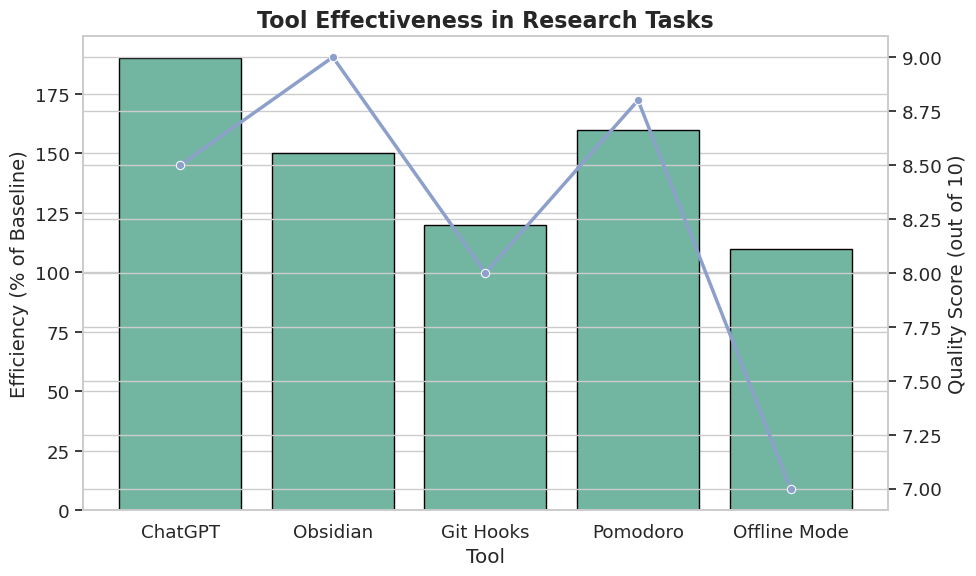

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

tools = ['ChatGPT', 'Obsidian', 'Git Hooks', 'Pomodoro', 'Offline Mode']
efficiency = [190, 150, 120, 160, 110]  # 相对 baseline %
quality = [8.5, 9.0, 8.0, 8.8, 7.0]  # 自评 / 10 分

df = pd.DataFrame({
    'Tool': tools,
    'Efficiency': efficiency,
    'Quality': quality
})

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = sns.color_palette()[0]
color2 = sns.color_palette()[2]

# 双y轴
ax2 = ax1.twinx()
sns.barplot(data=df, x='Tool', y='Efficiency', ax=ax1, color=color1, edgecolor='black')
sns.lineplot(data=df, x='Tool', y='Quality', ax=ax2, color=color2, marker='o', linewidth=2.5)

# 标签
ax1.set_ylabel('Efficiency (% of Baseline)', fontsize=14)
ax2.set_ylabel('Quality Score (out of 10)', fontsize=14)
ax1.set_title("Tool Effectiveness in Research Tasks", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_775499/2553580333.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Strategy', y='Effectiveness', ax=ax1,


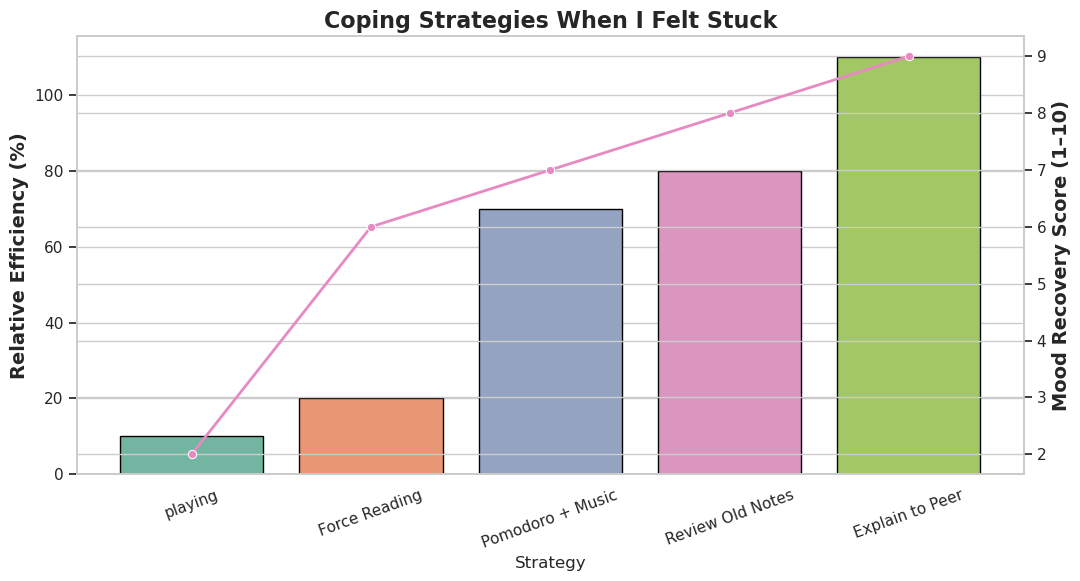

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 设置 seaborn 样式
sns.set(style='whitegrid', palette='Set2')
plt.rcParams.update({'font.size': 13})

# 数据准备
strategies = ['playing', 'Force Reading', 'Pomodoro + Music', 'Review Old Notes', 'Explain to Peer']
effectiveness = [10, 20, 70, 80, 110]  # 相对效率 (baseline=100)
mood_score = [2, 6, 7, 8, 9]  # 情绪恢复评分（这里填满了5项）

df = pd.DataFrame({
    'Strategy': strategies,
    'Effectiveness': effectiveness,
    'Mood Recovery': mood_score
})

# 自定义调色板
colors = sns.color_palette("Set2", n_colors=len(df))

# 开始绘图
fig, ax1 = plt.subplots(figsize=(11, 6))
ax2 = ax1.twinx()

# 条形图：相对效率
sns.barplot(data=df, x='Strategy', y='Effectiveness', ax=ax1,
            palette=colors, edgecolor='black')

# 折线图：情绪恢复评分
sns.lineplot(data=df, x='Strategy', y='Mood Recovery', ax=ax2,
             color=sns.color_palette()[3], marker='o', linewidth=2)

# 设置坐标轴标签和标题
ax1.set_ylabel('Relative Efficiency (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Mood Recovery Score (1–10)', fontsize=14, fontweight='bold')
ax1.set_title("Coping Strategies When I Felt Stuck", fontsize=16, fontweight='bold')

# 美化布局
ax1.tick_params(axis='x', rotation=20)
plt.tight_layout()
plt.show()
